# Feature engineering for classification and topic modelling of news headlines

As a first task we want to explore the different labels of category of the gathered news items. Missing values will be filled with 'Missing', rare labels will be grouped as 'Other'.
In a later step we want to train a ML model for text classification to predict a category label (supervised learning) as well as clustering the news into different topics (unsupervised learning) and compare them with the labeled categories.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlalchemy as sql

### Load the cleaned data from file

In [2]:
news = pd.read_csv('../eda/news.csv')

In [3]:
news.sort_values(by='date', ascending=False, inplace=True)
news.head()

,date,title,description,category,text,source
72711,2023-09-25 21:45:00,Mythos Normannen: Richard Löwenherz,Im 12. Jahrhundert erlebt die Normandie eine B...,ZDFinfo Doku,NaN,ZDF heute
72710,2023-09-25 10:40:35,"Geschäftsklima sinkt weiter: ""Wirtschaft tritt...",Erneut beurteilen deutsche Führungskräfte das ...,NaN,NaN,Tagesschau
72709,2023-09-25 10:38:05,Liveblog: ++ Merz drängt auf rasche Marschflug...,Unionsfraktionschef Merz drängt die Regierung ...,NaN,NaN,Tagesschau
72708,2023-09-25 10:36:36,Mobilfunkanbieter-Daten: Klagewelle wegen Schufa?,Nach einem Gerichtsurteil drohen Mobilfunkanbi...,NaN,NaN,Tagesschau
72707,2023-09-25 10:36:09,Baugipfel in Berlin: Was die Regierung gegen d...,"Zunächst kein Dämmstandard EH 40, dafür Steuer...",NaN,NaN,Tagesschau


### Replace missing categories by 'Missing'

First we detect the number of missing values in category and replace them with 'Missing'.

In [4]:
print(news['category'].isnull().sum())

27435


In [5]:
news['category'] = news['category'].fillna('Missing')
print(news['category'].isnull().sum())

0


### Remove rare labels from category and group them as 'Other'

In [6]:
print(news['category'].nunique())

19600


We have 19600 different category labels. We will group those categories that are present 
in less than 1% of the observations into a new label 'Other'.

In [7]:
tmp = news.groupby('category')['category'].count() / len(news)
frequent_labels_percentage = tmp[tmp > 0.01]

In [8]:
print(frequent_labels_percentage)

category
Ausland          0.055947
Deutschland      0.048837
Missing          0.377310
News             0.063029
Politik          0.012405
Ukraine-Krise    0.019117
Wirtschaft       0.016944
Name: category, dtype: float64


In [9]:
frequent_labels = frequent_labels_percentage.index.to_list()
print(frequent_labels)

['Ausland', 'Deutschland', 'Missing', 'News', 'Politik', 'Ukraine-Krise', 'Wirtschaft']


In [10]:
news['frequent_category'] = np.where(news['category'].isin(frequent_labels), news['category'], 'Other')
news.head()

,date,title,description,category,text,source,frequent_category
72711,2023-09-25 21:45:00,Mythos Normannen: Richard Löwenherz,Im 12. Jahrhundert erlebt die Normandie eine B...,ZDFinfo Doku,NaN,ZDF heute,Other
72710,2023-09-25 10:40:35,"Geschäftsklima sinkt weiter: ""Wirtschaft tritt...",Erneut beurteilen deutsche Führungskräfte das ...,Missing,NaN,Tagesschau,Missing
72709,2023-09-25 10:38:05,Liveblog: ++ Merz drängt auf rasche Marschflug...,Unionsfraktionschef Merz drängt die Regierung ...,Missing,NaN,Tagesschau,Missing
72708,2023-09-25 10:36:36,Mobilfunkanbieter-Daten: Klagewelle wegen Schufa?,Nach einem Gerichtsurteil drohen Mobilfunkanbi...,Missing,NaN,Tagesschau,Missing
72707,2023-09-25 10:36:09,Baugipfel in Berlin: Was die Regierung gegen d...,"Zunächst kein Dämmstandard EH 40, dafür Steuer...",Missing,NaN,Tagesschau,Missing


In [11]:
news['frequent_category'].value_counts()

frequent_category
Other            29551
Missing          27435
News              4583
Ausland           4068
Deutschland       3551
Ukraine-Krise     1390
Wirtschaft        1232
Politik            902
Name: count, dtype: int64

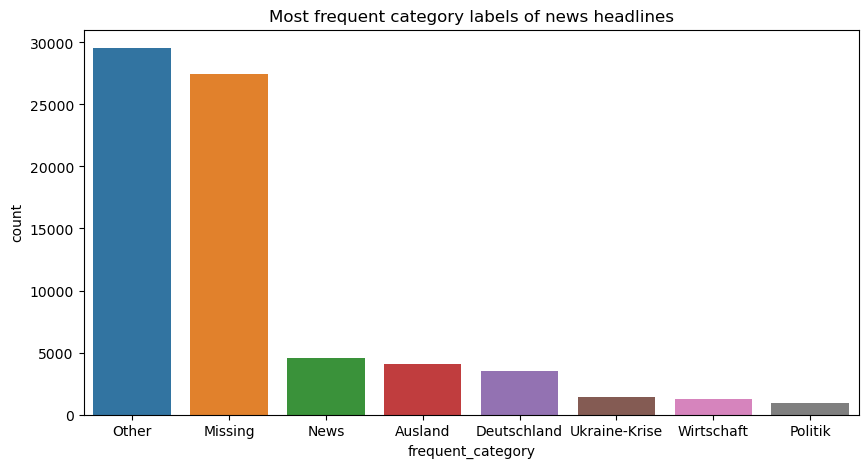

In [12]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.countplot(data=news, x='frequent_category', order=news['frequent_category'].value_counts().index)
plt.title('Most frequent category labels of news headlines')
plt.show()

### Store news

In [13]:
news.to_csv('news_feat_eng.csv', index=False)